In [1]:
import numpy as np
import pandas as pd 
from scipy.stats import ttest_1samp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

In [2]:

# Simulate a dataset with a mean of 10 and standard deviation of 2
np.random.seed(42) # Set a seed for reproducibility
sample_size = 100
population_mean = 10
population_sd = 2
data = np.random.normal(loc=population_mean, scale=population_sd, size=sample_size)

# Conduct a one-sample t-test to test the hypothesis
alpha = 0.05
t_statistic, p_value = ttest_1samp(data, popmean=10)

# Print the results
print("Sample mean:", np.mean(data))
print("t-statistic:", t_statistic)
print("p-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis that the mean is 10.")
else:
    print("Fail to reject the null hypothesis that the mean is 10.")


Sample mean: 9.792306965211813
t-statistic: -1.1434720057588446
p-value: 0.2556001762530366
Fail to reject the null hypothesis that the mean is 10.


In [3]:



# Simulate coin flips (1 for heads, 0 for tails) with a fair coin
np.random.seed(42) # Set a seed for reproducibility
num_flips = 100
coin_flips = np.random.binomial(n=1, p=0.5, size=num_flips)

# Calculate the proportion of heads
prop_heads = np.mean(coin_flips)

# Conduct a one-sample t-test to test the hypothesis that the coin is fair
alpha = 0.05
t_statistic, p_value = ttest_1samp(coin_flips, popmean=0.5)

# Print the results
print("Proportion of heads:", prop_heads)
print("t-statistic:", t_statistic)
print("p-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis that the coin is fair.")
else:
    print("Fail to reject the null hypothesis that the coin is fair.")


Proportion of heads: 0.47
t-statistic: -0.5980699588110716
p-value: 0.5511590111236772
Fail to reject the null hypothesis that the coin is fair.


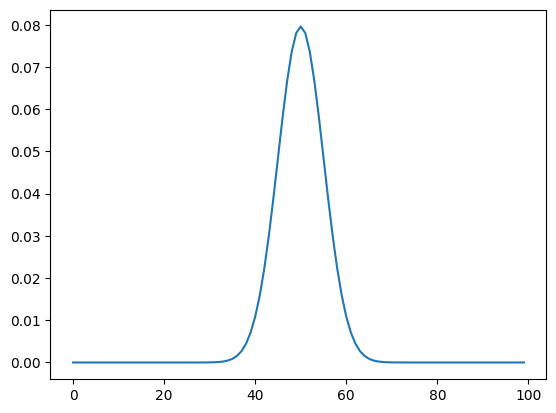

In [6]:
size = 100
coin_flips = np.random.choice([0, 1], size=size)
## we can use mean also in this case
val, count = np.unique(coin_flips, return_counts=True) 
count = count/len(coin_flips)
# print(val, count)
stats.binom.pmf(500, n=1000, p=0.5)
plt.plot(np.arange(100), stats.binom.pmf(np.arange(100), n=100, p=0.5))

[1 2 3 4 5 6] [0.177 0.175 0.16  0.169 0.162 0.157]


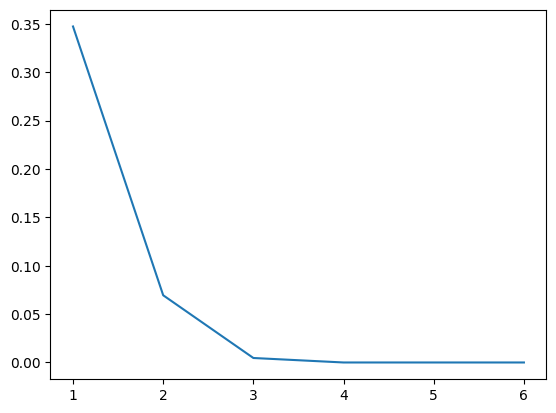

In [9]:
size = 1000
dice_roll = np.random.choice([1, 2, 3, 4, 5, 6], size=size)
## we can use mean also in this case
val, count = np.unique(dice_roll, return_counts=True) 
count = count/size
print(val, count)
plt.plot(np.arange(1,7), stats.binom.pmf(np.arange(1,7), n=3, p=1/6))

In [6]:
stats.binom.pmf(1, n=6, p=1/6)

0.4018775720164608

<BarContainer object of 6 artists>

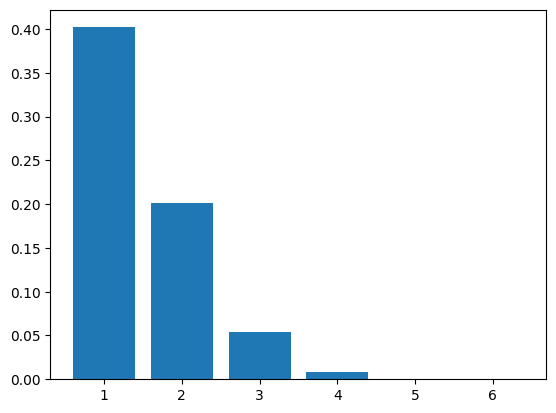

In [7]:
plt.bar(np.arange(1, 7), stats.binom.pmf(np.arange(1,7), n=6, p=1/6))

In [8]:


# Load the tips dataset
tips = sns.load_dataset("tips")

# Calculate the mean tip for males and females
male_tips = tips[tips["sex"] == "Male"]["tip"]
female_tips = tips[tips["sex"] == "Female"]["tip"]
male_mean = male_tips.mean()
female_mean = female_tips.mean()

# Perform a two-sample t-test to determine if there is a significant difference in tip amounts between males and females
t_stat, p_value = ttest_ind(male_tips, female_tips, equal_var=False)

# Print the results
print("Male mean tip: ${:.2f}".format(male_mean))
print("Female mean tip: ${:.2f}".format(female_mean))
print("t-statistic: {:.2f}".format(t_stat))
print("p-value: {:.4f}".format(p_value))


Male mean tip: $3.09
Female mean tip: $2.83
t-statistic: 1.49
p-value: 0.1378


In [9]:


# Create a normal distribution with mean 5 and standard deviation 2
dist = stats.norm(loc=5, scale=2)

# Calculate the probability of getting a value between 4 and 6
prob = dist.cdf(6) - dist.cdf(4)

# Calculate the 95% confidence interval for the mean of a sample of size 50
n = 50
sample_mean = 7
sample_std = 2
conf_interval = stats.norm.interval(0.95, loc=sample_mean, scale=sample_std/np.sqrt(n))

# Generate a random sample of size 100 from the distribution
sample = dist.rvs(size=100)

# Fit a normal distribution to the sample
fit_params = stats.norm.fit(sample)

# Calculate the Kolmogorov-Smirnov statistic to test the fit
ks_stat, p_value = stats.kstest(sample, stats.norm.cdf, fit_params)


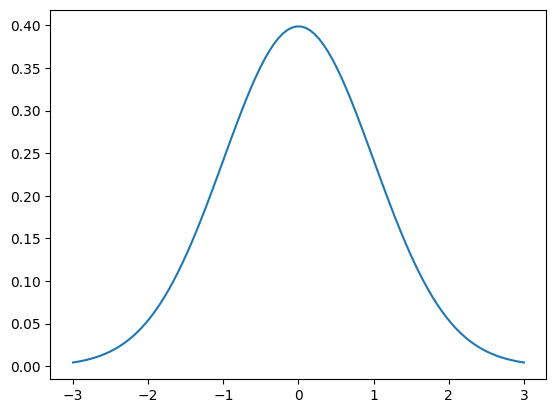

In [10]:
# Define the mean and standard deviation of the normal distribution
mu = 0
sigma = 1

# Create an array of x values to compute the PDF for
x_values = np.linspace(-3, 3, 100)

# Compute the PDF at each x value
pdf_values = stats.norm.pdf(x_values, mu, sigma)

# Plot the PDF
import matplotlib.pyplot as plt
plt.plot(x_values, pdf_values)
plt.show()


In [11]:
# Define the mean and standard deviation of the normal distribution
mu = 0
sigma = 1

# Compute the CDF at x = 1.5
cdf = stats.norm.cdf(1.5, mu, sigma)

# Print the result
print("CDF at x = 1.5: {:.4f}".format(cdf))


CDF at x = 1.5: 0.9332


In [12]:
# Define the mean and standard deviation of the normal distribution
mu = 0
sigma = 1

# Compute the quantile corresponding to the 95th percentile
quantile = stats.norm.ppf(0.95, mu, sigma)

# Print the result
print("95th percentile: {:.4f}".format(quantile))


95th percentile: 1.6449


In [13]:
# Define the mean and standard deviation of the normal distribution
mu = 0
sigma = 1

# Compute the PMF at x = 1
pmf = stats.binom.pmf(1, mu, sigma)

# Print the result
print("PMF at x = 1: {:.4f}".format(pmf))


PMF at x = 1: 0.0000


In [14]:


df = pd.DataFrame({'A': [1, 1, 2, 1, 2],
                   'B': [1, 2, 3, 4, 5]}, columns=['A', 'B'])
df

,A,B
0,1,1
1,1,2
2,2,3
3,1,4
4,2,5


In [15]:
df.groupby('A', as_index=False).max()

,A,B
0,1,4
1,2,5


In [16]:

# Sample data for the control group and the treatment group
control = np.array([23, 24, 22, 21, 25, 20, 22, 24, 23, 21])
treatment = np.array([18, 20, 17, 19, 22, 20, 21, 19, 18, 20])

# Calculate the sample mean and standard deviation for each group
control_mean = np.mean(control)
control_std = np.std(control, ddof=1)  # ddof=1 for sample standard deviation
treatment_mean = np.mean(treatment)
treatment_std = np.std(treatment, ddof=1)

# Calculate the standard error of the difference in means
se = np.sqrt((control_std**2 / len(control)) + (treatment_std**2 / len(treatment)))

# Calculate the test statistic
z = (control_mean - treatment_mean) / se

# Calculate the p-value (two-tailed test)
p_value = 2 * norm.cdf(-np.abs(z))

# Set the significance level (alpha) and compare to the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis, the mean of the control group is greater than the mean of the treatment group.")
else:
    print("Fail to reject null hypothesis, there is insufficient evidence to conclude that the mean of the control group is greater than the mean of the treatment group.")


Reject null hypothesis, the mean of the control group is greater than the mean of the treatment group.


### alternative
In ztest the alternative hypothesis, H1, has to be one of the following

‘two-sided’: H1: difference in means not equal to value (default) ‘larger’ : H1: difference in means larger than value ‘smaller’ : H1: difference in means smaller than value

In [17]:


# Define the data for the control and treatment groups
# Sample data for the control group and the treatment group
control = np.array([23, 24, 22, 21, 25, 20, 22, 24, 23, 21])
treatment = np.array([18, 20, 17, 19, 22, 20, 21, 19, 18, 20])
control_mean = control.mean()
control_std = control.std()
control_n = 50
treatment_mean = 8
treatment_std = 3
treatment_n = 60

# Compute the test statistic and p-value
z_stat, p_value = ztest(x1=control, x2=treatment, value=0, 
                        alternative='larger', 
                        usevar='pooled', 
                        ddof=1)
# usevar='pooled' specifies to pool the variances of the two groups assuming equal variances
# ddof=1 specifies to use n-1 degrees of freedom for the pooled variance estimate

# Compare the p-value to the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The mean of the control group is significantly greater than the mean of the treatment group.")
else:
    print("Fail to reject the null hypothesis. There is insufficient evidence to conclude that the mean of the control group is greater than the mean of the treatment group.")


Reject the null hypothesis. The mean of the control group is significantly greater than the mean of the treatment group.


## Two sample ztest

Two-sample Z-test for means is a statistical hypothesis testing technique that is used to determine if the difference between the two population means is not statistically significant. This test is used when the standard deviations (σ) of the two populations are known. This test can be used when we have a sample from each population and we know the variance for these populations.

In a two-sample z-test, the variance of the population is unknown and has to be estimated from the variances of the two samples. There are two common ways to estimate the variance: using the pooled variance estimate or using the unpooled variance estimate.

The usevar parameter in the statsmodels.stats.weightstats.ztest function allows you to specify which variance estimate to use. It can take one of the following values:

'pooled': This assumes that the population variances of the two samples are equal and estimates the pooled variance as the weighted average of the sample variances. This is the default value.

'unequal': This assumes that the population variances of the two samples are not equal and estimates the variance of the difference between the sample means using the unpooled variance estimate.

Using the pooled variance estimate assumes that the two samples have the same population variance, which may not always be true. Using the unpooled variance estimate allows for different population variances, but this can reduce the power of the test if the variances are actually equal.

In general, it is recommended to use the pooled variance estimate unless there is strong evidence to suggest that the population variances are different. In either case, it is important to check the assumption of equal variances using a test such as the F-test before performing the z-test.





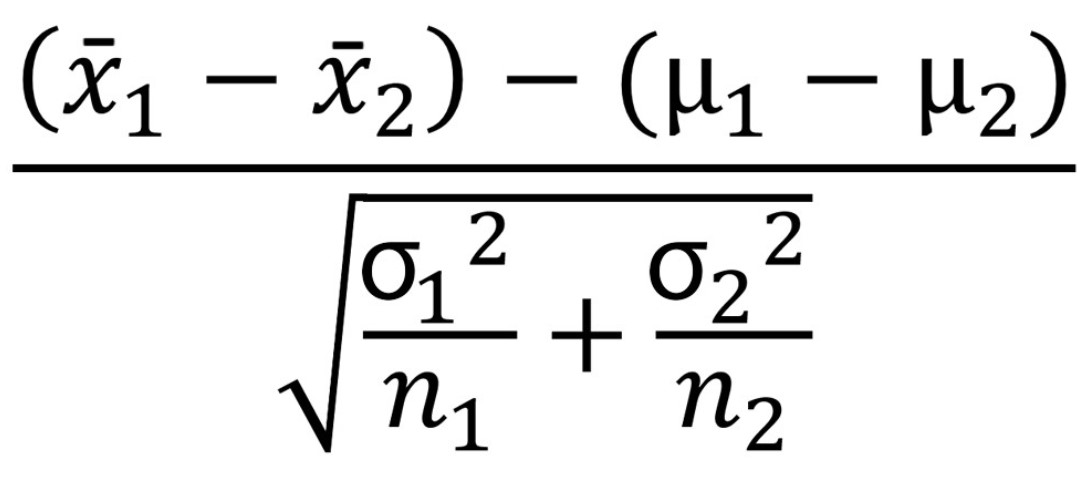

x̄1 is the mean of the first sample

x̄2 is the mean of the second sample

μ1 is the mean of the first population

μ2 is the mean of the second population

(μ1 – μ2) is hypothesized difference between the population means

σ1 is the standard deviation of the first population

σ2 is the standard deviation of the second population

n1 is the number of the data points in the first sample

n2 is the number of the data points in the second sample

<hr>

Assumptions for t test for independent groups

1. Independence
2. Normality
3. Equal variances

#### Normality

When there is a normal (bell shaped,
symmetric, well-behaved) distribution:
- the test works well
- rejects H0 when it should
- does not reject when it should not
- It is a powerful statistical test

When the distribution is “strange” (skewed, “wacky” etc.):
- High (or low) values have a big influence on mean and SD
- Sample results will vary a lot
- The test will be less reliable
- Sometime we reject H0 when we should not
- Sometimes we do not reject when we should

#### Equal Variance

We are trying to compare the means of two groups
- If the SDs are similar, then things are okay and the t-test will work well
- But if the SDs are not similar, then be careful
    - The t-test was developed by assuming that the SDs are equal

<hr>

whatever we want to show come in alternative hypothesis 
if the hypothesis test shows that the alternative is correct then this shows that my result is positive

if hypothesis test shows that my alternative is incorrect then my result is negative

if our result positive and it matches with reality then it is True Positive
if our result is negative and it matches with reality then it is True Negative

Our success is in rejecting null hypothesis


Let's make the following definitions:

"Wolf" is a positive class.
"No wolf" is a negative class.
We can summarize our "wolf-prediction" model using a 2x2 confusion matrix that depicts all four possible outcomes:

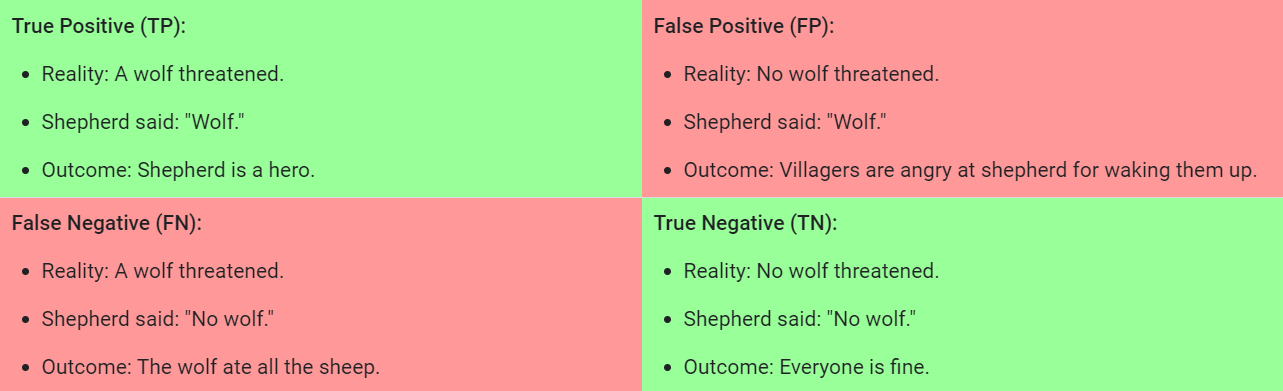

A true positive is an outcome where the model correctly predicts the positive class. Similarly, a true negative is an outcome where the model correctly predicts the negative class.

A false positive is an outcome where the model incorrectly predicts the positive class. And a false negative is an outcome where the model incorrectly predicts the negative class.

## Assessing the Assumptions of Homogeneity
The assumption of homogeneity of variance means that the level of variance for a particular variable is constant across the sample. 

If you’ve collected groups of data then this means that the variance of your outcome variable(s) should be the same in each of these groups (i.e. across schools, years, testing groups or predicted values).

The assumption of homogeneity is important for ANOVA testing and in regression models. In ANOVA, when homogeneity of variance is violated there is a greater probability of falsely rejecting the null hypothesis. In regression models, the assumption comes in to play with regards to residuals (aka errors).

Levene's test is used to test if k samples have equal variances. Equal variances across samples is called homogeneity of variance. Some statistical tests, for example the analysis of variance, assume that variances are equal across groups or samples. The Levene test can be used to verify that assumption.

Differences between parametric and nonparametric statistics

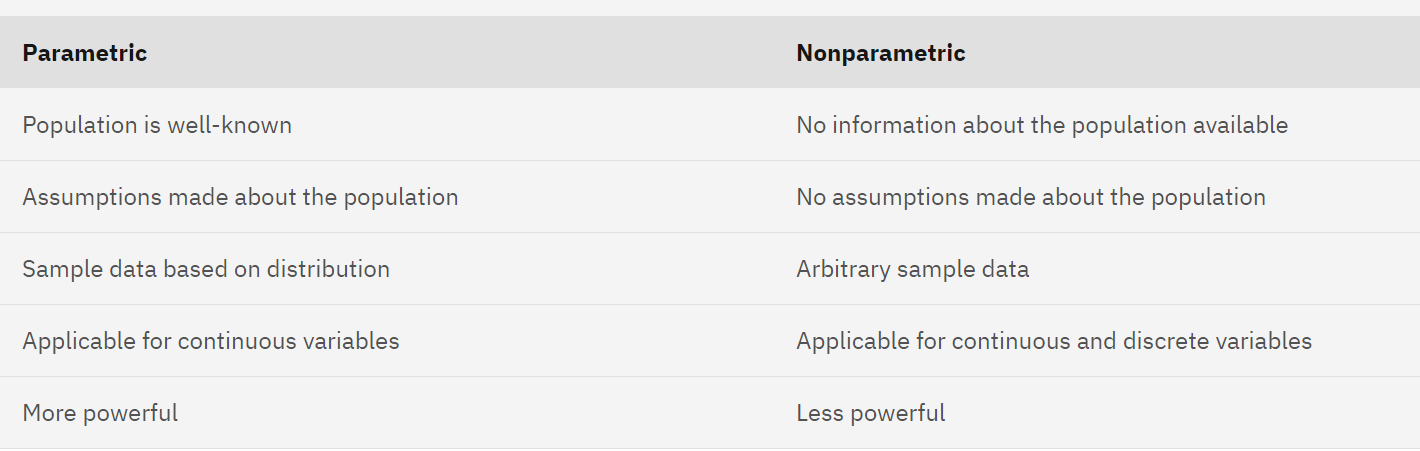

## Usage of parametric and nonparametric statistics

To decide whether to use parametric or nonparametric statistics, you should consider several criteria about the sample data and the assumptions, and carefully evaluate the validity of those assumptions.

Consider the following criteria for the decision making:

Parametric statistics are more powerful for the same sample size than nonparametric statistics.
Parametric statistics use continuous variables, whereas nonparametric statistics often use discrete variables.
If you use parametric statistics when the data strongly diverts from the assumptions on which the parametric statistics are based, the result might lead to incorrect conclusions.
Nonparametric statistics usually can be done fast and in an easy way. They are designed for smaller numbers of data, and also easier to understand and to explain.

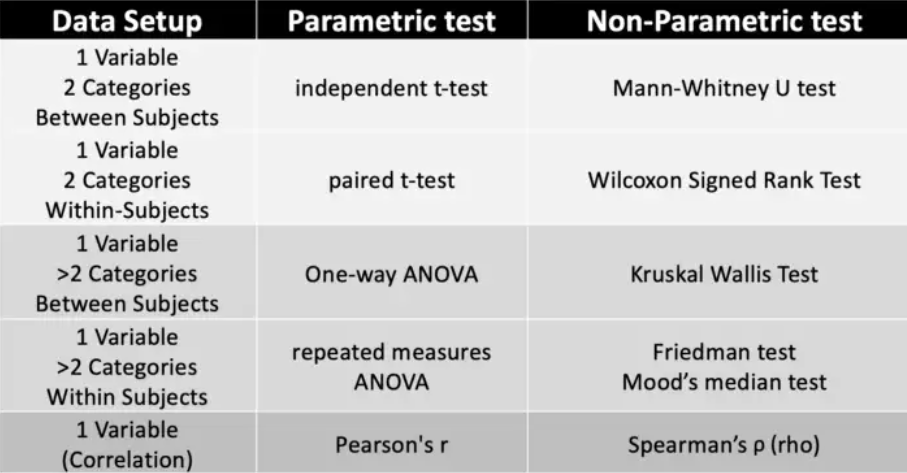